# 学業成績の分析

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from see import see

授業の成績（優秀良可不可）とGP（Grade Point）を使った成績の分析を行う。成績表のコピーは神戸大学の「うりぼーネット」を用いる例を考えるが、Web上で成績表が表示されるのであればコードを少し修正するだけで分析が行えるであろう。

## データの読み込み

### 学生

「うりぼー」→ 成績修得情報　→　成績表を選択しコピー

In [2]:
#ーーーーー dfに成績表を割り当てる ーーーーー

# df = pd.read_clipboard()
# df.head()

In [3]:
#ーーーーー csvに保存 ーーーーー

# df.to_csv('成績表20200708.csv')

In [4]:
#ーーーーー 保存先のフォルダの確認 ーーーーー

# %pwd

### 例

例のファイルを使う場合。

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Haruyama-KobeU/Py4Basics/master/data/data_for_mark.csv')
df

,No.,区分,科目大区分,科目中区分,科目ナンバー,科目,単位数,修得年度,修得学期,評語,科目GP,合否
0,1,全学共通授業科目,基礎教養科目,NaN,U1AA100,XX学,1,2020,前期,合格,-,合
1,2,全学共通授業科目,基礎教養科目,NaN,U1AA100,XX学,1,2020,前期,合格,-,合
2,3,全学共通授業科目,基礎教養科目,NaN,U1AA100,XX学,1,2020,前期,可,2,合
3,4,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ａ,1,2020,後期,秀,4.3,合
4,5,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ｂ,1,2019,後期,可,2,合
5,6,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ａ,1,2019,後期,優,4,合
6,7,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ｂ,1,2019,前期,秀,4.3,合
7,8,全学共通授業科目,基礎教養科目,NaN,U1AA100,X学,1,2018,前期,可,2,合
8,9,全学共通授業科目,基礎教養科目,NaN,U1AB100,X学Ａ,1,2018,後期,秀,4.3,合
9,10,全学共通授業科目,基礎教養科目,NaN,U1AB100,X学Ｂ,1,2018,後期,可,2,合


## 列の内容の確認

ステップ１：列のラベルの表示

In [6]:
col = df.columns
col

Index(['No.', '区分', '科目大区分', '科目中区分', '科目ナンバー', '科目', '単位数', '修得年度', '修得学期',
       '評語', '科目GP', '合否'],
      dtype='object')

In [7]:
for c in col:
    print(c)

No.
区分
科目大区分
科目中区分
科目ナンバー
科目
単位数
修得年度
修得学期
評語
科目GP
合否


ステップ２：それぞれの列の要素の種類を表示方法

In [8]:
df['区分'].unique()

array(['全学共通授業科目', '高度教養科目', '専門科目'], dtype=object)

スッテプ３：スッテプ１と２を同時に

In [9]:
for c in col[1:]:      # Noの列を除外
    x = df[c].unique()
    print(c, x)

区分 ['全学共通授業科目' '高度教養科目' '専門科目']
科目大区分 ['基礎教養科目' '高度教養科目' '専門科目']
科目中区分 [nan]
科目ナンバー ['U1AA100' 'U1AB100' 'U1AD100']
科目 ['XX学' 'XX学Ａ' 'XX学Ｂ' 'X学Ａ' 'X学Ｂ' 'X学']
単位数 [1 2 4]
修得年度 [2020 2019 2018]
修得学期 ['前期' '後期']
評語 ['合格' '可' '秀' '優' '良' '取消' '不可' '認定']
科目GP ['-' '2' '4.3' '4' '3' '0' '*']
合否 ['合' nan '否']


## `DataFrame`の作成

In [10]:
cond1 = ( df['区分']=='全学共通授業科目' )
cond2 = ( df['区分']=='高度教養科目' )
cond1or2 = ( cond1 | cond2)
cond3 = ( df['区分']=='専門科目' )

df_other = df.loc[cond1or2,:]
df_econ = df.loc[cond3,:]

In [11]:
len(df),len(df_other),len(df_econ)

(30, 15, 15)

全角文字を使わない方法

In [12]:
kubun = df.loc[:,col[1]]

kubun_arr = kubun.unique()
kubun_arr

array(['全学共通授業科目', '高度教養科目', '専門科目'], dtype=object)

In [13]:
cond1 = ( kubun==kubun_arr[0] )
cond2 = ( kubun==kubun_arr[1] )
cond1or2 = ( cond1 | cond2)
cond3 = ( kubun==kubun_arr[2] )

df_other = df.loc[cond1or2,:]
df_econ = df.loc[cond3,:]

In [14]:
len(df),len(df_other),len(df_econ)

(30, 15, 15)

## 全科目

### `f-string`

`f-string`を使うと文字列の`{}`の中の変数を評価して表示することが可能となる。

In [15]:
x='春山'
print(f'私は{x}ゼミに所属しています。')

私は春山ゼミに所属しています。


In [16]:
l = [1,2,3]
print(f'合計は{sum(l)}です。')

合計は6です。


### 優・秀・良・可・不可などの数

#### 簡単な方法

`value_counts()`を使うと簡単になる。

In [17]:
df.loc[:,'評語'].value_counts()

評語
可     10
秀      7
優      5
合格     2
取消     2
不可     2
良      1
認定     1
Name: count, dtype: int64

#### 表示を整理したい場合

評語の種類

In [18]:
m = df.loc[:,'評語'].unique()
m

array(['合格', '可', '秀', '優', '良', '取消', '不可', '認定'], dtype=object)

In [19]:
mark = [m[2],m[3],m[4],m[1],m[0],m[-1],m[-2],m[-3]]
mark

['秀', '優', '良', '可', '合格', '認定', '不可', '取消']

In [20]:
for m in mark:
    print(m)

print('-'*7,'\n合計')

秀
優
良
可
合格
認定
不可
取消
------- 
合計


In [21]:
lst = []

for m in mark:
    
    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    no = len(df0)
    lst.append(no)

lst

[7, 5, 1, 10, 2, 1, 2, 2]

In [22]:
lst = []

for m in mark:
    
    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    no = len(df0)
    lst.append(no)
    
    print(m, no)

print('-'*7,'\n合計',sum(lst))

秀 7
優 5
良 1
可 10
合格 2
認定 1
不可 2
取消 2
------- 
合計 30


### 優・秀・良・可・不可などの％

#### 簡単な方法

In [23]:
(
    100*df.loc[:,'評語'].value_counts(normalize=True)
).round(1)

評語
可     33.3
秀     23.3
優     16.7
合格     6.7
取消     6.7
不可     6.7
良      3.3
認定     3.3
Name: proportion, dtype: float64

#### 表示を整理したい場合

％だけを表示する。

In [24]:
lst = []

for m in mark:
    
    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    percent = 100 * len(df0) / len(df)
    lst.append(percent)

lst

[23.333333333333332,
 16.666666666666668,
 3.3333333333333335,
 33.333333333333336,
 6.666666666666667,
 3.3333333333333335,
 6.666666666666667,
 6.666666666666667]

％と評語も表示する。

In [25]:
lst = []

for m in mark:

    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    percent = 100 * len(df0) / len(df)
    lst.append(percent)
    
    print(f'{m}: {percent}')
    
print('-'*30,f'\n合計: {sum(lst)}')

秀: 23.333333333333332
優: 16.666666666666668
良: 3.3333333333333335
可: 33.333333333333336
合格: 6.666666666666667
認定: 3.3333333333333335
不可: 6.666666666666667
取消: 6.666666666666667
------------------------------ 
合計: 100.00000000000001


小数点の表示を調整する。

In [26]:
lst = []

for m in mark:

    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    percent = 100 * len(df0) / len(df)
    lst.append(percent)

    print(f'{m} {percent:.1f}')   # 小数点第ー位まで表示
    
print('-'*10,f'\n合計: {sum(lst):.0f}')  # 小数点は表示しない

秀 23.3
優 16.7
良 3.3
可 33.3
合格 6.7
認定 3.3
不可 6.7
取消 6.7
---------- 
合計: 100


`%`を追加し，表示も揃える。

In [27]:
lst = []

for m in mark:

    cond = ( df['評語']==m )
    df0 = df.loc[cond,:]
    percent = 100 * len(df0) / len(df)
    lst.append(percent)

    print(f'{m:\u3000<2}{percent:>5.1f}')  # ここを修正
    
print('-'*10,f'\n合計: {sum(lst):.0f}')

秀　 23.3
優　 16.7
良　  3.3
可　 33.3
合格  6.7
認定  3.3
不可  6.7
取消  6.7
---------- 
合計: 100


ここで「秀」など全角を使っているので`\u3000`が必要となる。

## 全学共通授業科目

### 数

In [28]:
df_other.loc[:,'評語'].value_counts()

評語
可     6
秀     4
優     3
合格    2
Name: count, dtype: int64

In [29]:
lst = []

for m in mark:
    
    cond = ( df_other['評語']==m )
    df0 = df_other.loc[cond,:]
    no = len(df0)
    lst.append(no)
    
    print(m,no)
    
print('-'*10,f'\n合計 {sum(lst)}')

秀 4
優 3
良 0
可 6
合格 2
認定 0
不可 0
取消 0
---------- 
合計 15


### 割合

In [30]:
(
    100 * df_other.loc[:,'評語'].value_counts(normalize=True)
).round(1)

評語
可     40.0
秀     26.7
優     20.0
合格    13.3
Name: proportion, dtype: float64

In [31]:
lst = []

for m in mark:
    
    cond = ( df_other['評語']==m )
    df0 = df_other.loc[cond,:]
    percent = 100 * len(df0) / len(df_other)
    lst.append(percent)
    
    print(f'{m} {percent:.1f}')
    
print('-'*10,f'\n合計 {sum(lst):.0f}')

秀 26.7
優 20.0
良 0.0
可 40.0
合格 13.3
認定 0.0
不可 0.0
取消 0.0
---------- 
合計 100


## 専門科目

In [32]:
df_econ.loc[:,'評語'].value_counts()

評語
可     4
秀     3
優     2
取消    2
不可    2
良     1
認定    1
Name: count, dtype: int64

In [33]:
lst = []

for m in mark:
    
    cond = ( df_econ['評語']==m )
    df0 = df_econ.loc[cond,:]
    no = len(df0)
    lst.append(no)
    
    print(m,no)
    
print('-'*10,f'\n合計 {sum(lst)}')

秀 3
優 2
良 1
可 4
合格 0
認定 1
不可 2
取消 2
---------- 
合計 15


In [34]:
(
    100 * df_econ.loc[:,'評語'].value_counts(normalize=True)
).round(1)

評語
可     26.7
秀     20.0
優     13.3
取消    13.3
不可    13.3
良      6.7
認定     6.7
Name: proportion, dtype: float64

In [35]:
lst = []

for m in mark:
    
    cond = ( df_econ['評語']==m )
    df0 = df_econ.loc[cond,:]
    percent = 100 * len(df0) / len(df_econ)
    lst.append(percent)
    
    print(f'{m} {percent:.1f}')
    
print('-'*10, f'\n合計 {sum(lst):.0f}')

秀 20.0
優 13.3
良 6.7
可 26.7
合格 0.0
認定 6.7
不可 13.3
取消 13.3
---------- 
合計 100


## GPAの推移

### 「科目GP」で記号がある行の削除

科目GPの要素の種類

In [36]:
df.loc[:,'科目GP'].unique()

array(['-', '2', '4.3', '4', '3', '0', '*'], dtype=object)

全て文字列となっているので，`-`と`*`の記号が含まれない行だけから構成される`DataFrame`を作成する。

後で「科目GP」のデータ型を変更する際に警告がでないようにメソッド`.copy()`を使い`DataFrame`のコピーを作成する。

In [37]:
gpa = df.query("科目GP not in ['-', '*']").copy()
gpa.head()

,No.,区分,科目大区分,科目中区分,科目ナンバー,科目,単位数,修得年度,修得学期,評語,科目GP,合否
2,3,全学共通授業科目,基礎教養科目,NaN,U1AA100,XX学,1,2020,前期,可,2,合
3,4,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ａ,1,2020,後期,秀,4.3,合
4,5,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ｂ,1,2019,後期,可,2,合
5,6,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ａ,1,2019,後期,優,4,合
6,7,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ｂ,1,2019,前期,秀,4.3,合


In [38]:
gpa['科目GP'].unique()

array(['2', '4.3', '4', '3', '0'], dtype=object)

データ型は`object`（文字列）のままである。

属性`.dtypes`を使って確認することもできる。

In [39]:
gpa['科目GP'].dtypes

dtype('O')

`O`は`object`。

### 「科目GP」を浮動小数点に変更

科目GPは`object`（文字列）となっているので，メソッド`astype()`を使って`float`に変換する。

In [40]:
gpa['科目GP'] = gpa['科目GP'].astype(float)

In [41]:
gpa.dtypes

No.         int64
区分         object
科目大区分      object
科目中区分     float64
科目ナンバー     object
科目         object
単位数         int64
修得年度        int64
修得学期       object
評語         object
科目GP      float64
合否         object
dtype: object

### 図示：毎年

#### `groupby`

`groupby`は`DataFrame`や`Series`をグループ化し，グループ内の計算を簡単に行うことができる便利なメソッドである。「修得年度」でグループ化し，平均を計算する。

In [42]:
two_vars = ['単位数','科目GP']

In [43]:
gpa_grouped = gpa.groupby('修得年度')
gpa_mean = gpa_grouped[two_vars].mean()
gpa_mean

,単位数,科目GP
修得年度,,
2018,1.375000,2.6625
2019,1.100000,3.3200
2020,1.666667,3.1000


* `gpa_grouped`は`DetaFrame`ではないので注意しよう。
* `gpa_grouped`には`median()`，`std()`，`var()`，`min()`，`max()`などが使える。その他の属性・メソッドを確認。

#### 図示

方法１：横軸に文字列を使う

`gpa_mean.index`を確認する。

In [44]:
gpa_mean.index

Index([2018, 2019, 2020], dtype='int64', name='修得年度')

これを使い横軸に使う文字列を作成する。

In [45]:
yr = [str(i) for i in gpa_mean.index]
yr

['2018', '2019', '2020']

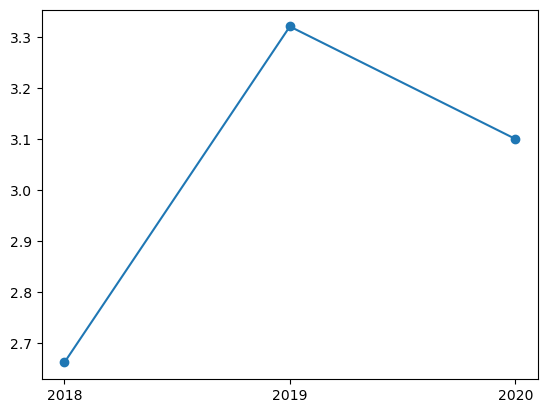

In [46]:
plt.plot(yr,gpa_mean['科目GP'], 'o-')
pass

方法２：`plt.xticks()`を使って

横軸を調整するために，`gpa_mean`のインデックスを確認。

In [47]:
yr = gpa_mean.index
yr

Index([2018, 2019, 2020], dtype='int64', name='修得年度')

`xticks()`を使って横軸の表示を指定する。

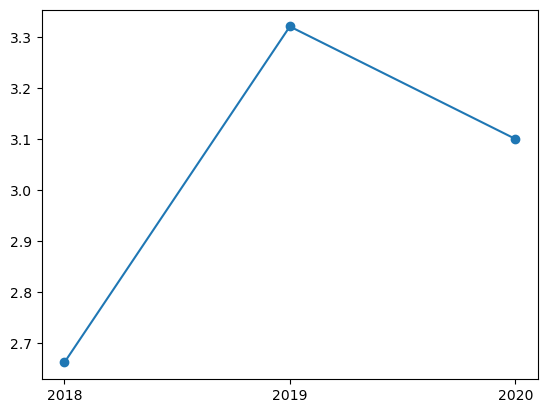

In [48]:
plt.plot('科目GP', 'o-', data=gpa_mean)
plt.xticks(yr)
pass

### 図示：前期後期毎

#### 「修得学期」の英語化

「修得学期」の要素が日本語だと警告が出るため，メソッド`.replace()`を使って英語に変換する。`replace()`の引数は辞書で指定する。
* キー：変更する対象の数値や文字列
* 値：変更後の数値や文字列

In [49]:
gpa['修得学期'] = gpa['修得学期'].replace({'前期':'1','後期':'2'})
gpa.head()

,No.,区分,科目大区分,科目中区分,科目ナンバー,科目,単位数,修得年度,修得学期,評語,科目GP,合否
2,3,全学共通授業科目,基礎教養科目,NaN,U1AA100,XX学,1,2020,1,可,2.0,合
3,4,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ａ,1,2020,2,秀,4.3,合
4,5,全学共通授業科目,基礎教養科目,NaN,U1AB100,XX学Ｂ,1,2019,2,可,2.0,合
5,6,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ａ,1,2019,2,優,4.0,合
6,7,全学共通授業科目,基礎教養科目,NaN,U1AD100,X学Ｂ,1,2019,1,秀,4.3,合


#### `groupby`

「修得年度」と「修得学期」でグループ化する。

In [50]:
gpa_grouped = gpa.groupby(['修得年度','修得学期'])
gpa_mean = gpa_grouped[two_vars].mean()
gpa_mean

単位数      科目GP
修得年度 修得学期                    
2018 1     1.000000  1.000000
     2     1.500000  3.216667
2019 1     1.000000  3.150000
     2     1.250000  3.575000
2020 1     1.333333  2.666667
     2     2.000000  3.533333

#### 図示

横軸に文字列を使う。まず`gpa_mean`のインデックスを確認する。

In [52]:
gpa_mean.index

MultiIndex([(2018, '1'),
            (2018, '2'),
            (2019, '1'),
            (2019, '2'),
            (2020, '1'),
            (2020, '2')],
           names=['修得年度', '修得学期'])

これを使い横軸に使う文字列を作成する。

In [53]:
yr_half = [str(i[0])+'-'+str(i[1]) for i in gpa_mean.index]
yr_half

['2018-1', '2018-2', '2019-1', '2019-2', '2020-1', '2020-2']

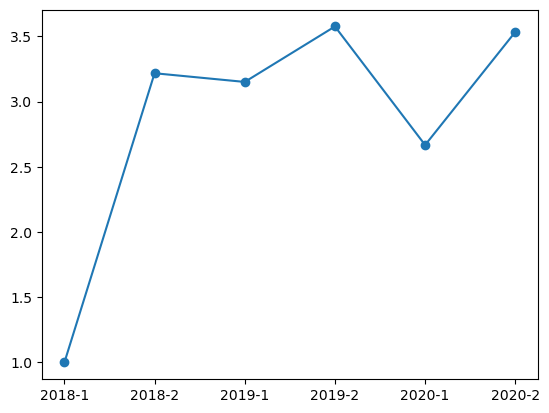

In [55]:
plt.plot(yr_half, gpa_mean['科目GP'], marker='o')
pass